In [4]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../dataset/insurance.csv')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [7]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

lr = LinearRegression()
ridge = Ridge(alpha=0.5)
dt = DecisionTreeRegressor(max_depth = 3)
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=50, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)

regressors = [('Linear Regression', lr), ('Ridge Regression', ridge),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), ('XGBoost', xgb)]

Linear Regression score: 0.79627
Ridge Regression score: 0.79613
Decision Tree score: 0.87516
Random Forest score: 0.89505
AdaBoost score: 0.88616
Gradient Boosting Regressor score: 0.8965
XGBoost score: 0.89736


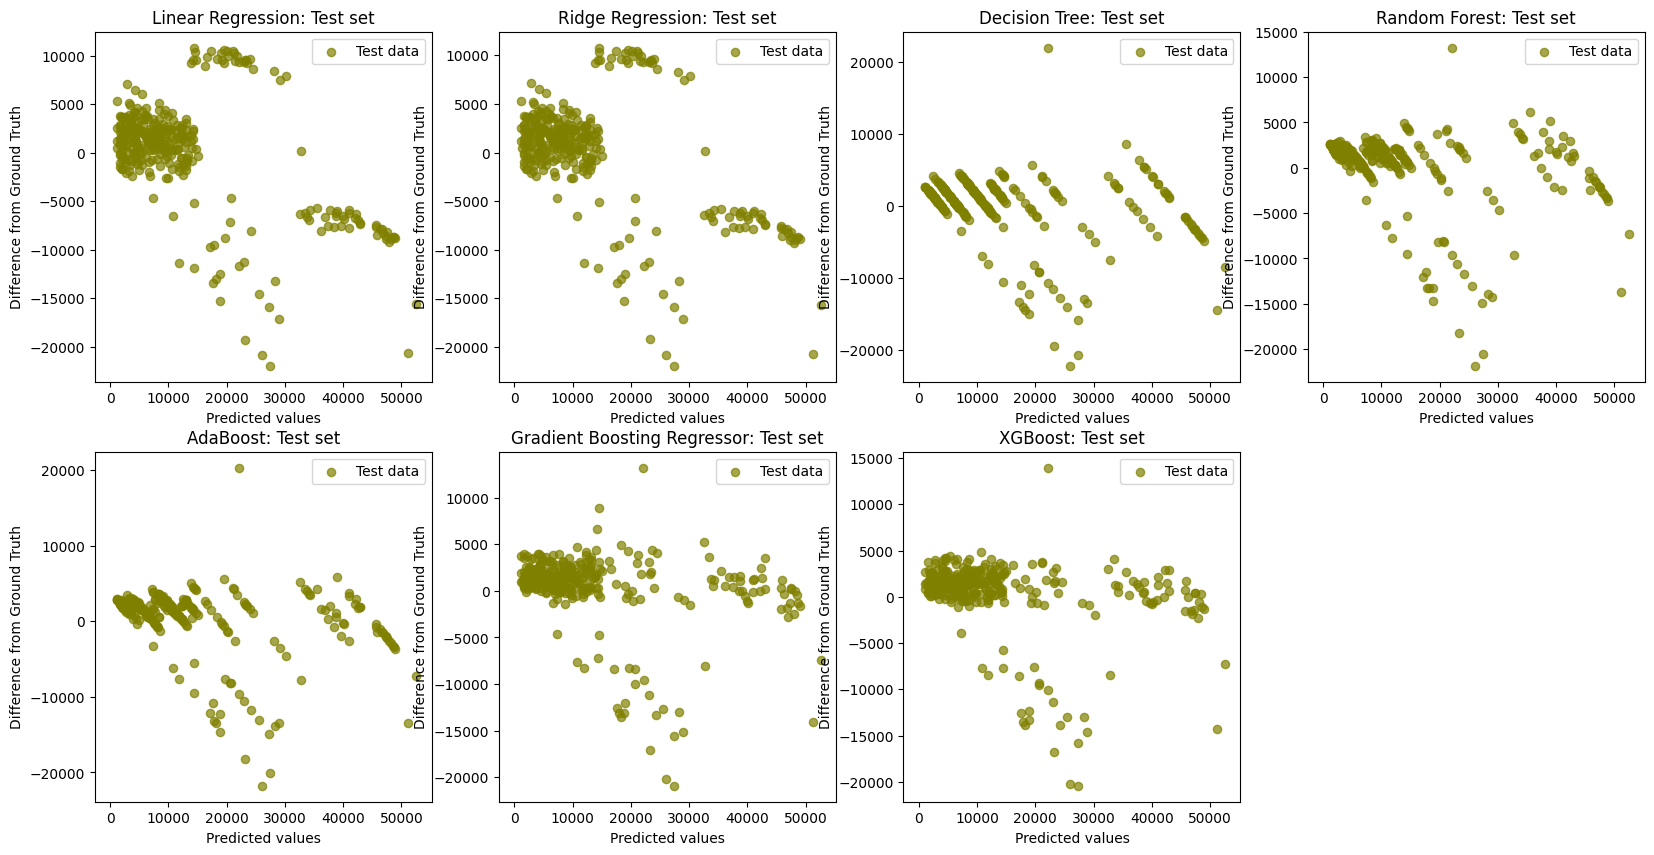

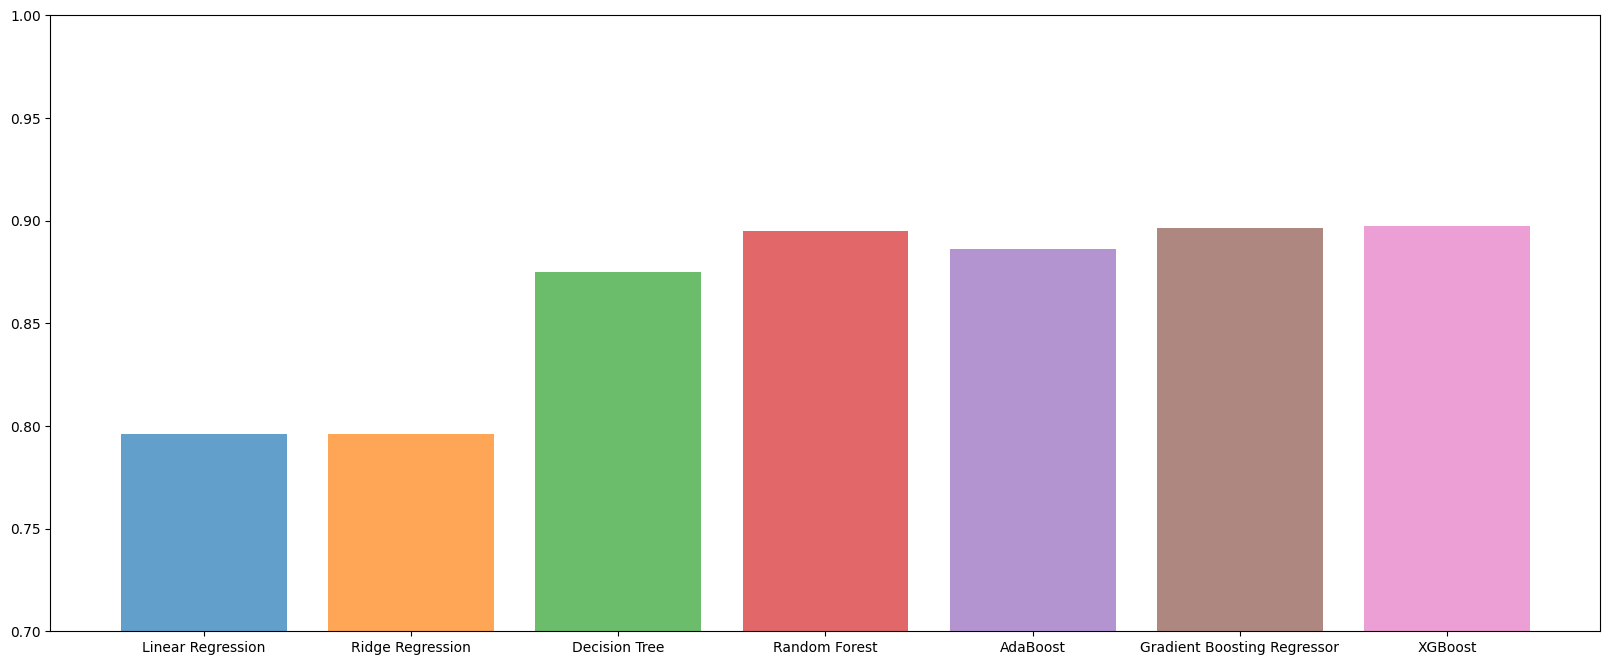

In [13]:
fig = plt.figure(figsize=(20,10))
fig2 = plt.figure(figsize=(20,8))

for i, (regressor_name, regressor) in enumerate(regressors):
    regressor.fit(x_train, y_train)    

    y_test_pred = regressor.predict(x_test)
    accuracy = regressor.score(x_test,y_test).round(5)
    print(f"{regressor_name} score:", accuracy)
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.scatter(y_test, y_test_pred - y_test, c = 'olive', 
                marker = 'o', s = 35, alpha = 0.7, label = 'Test data')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Difference from Ground Truth')
    ax.legend(loc = 'upper right')
    ax.hlines(y = 0, xmin = 0, xmax = 1, lw = 1, color = 'red')
    ax.set_title(f'{regressor_name}: Test set')

    plt.bar(regressor_name, accuracy, alpha=0.7)
    plt.ylim(0.7, 1.0)

In [16]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

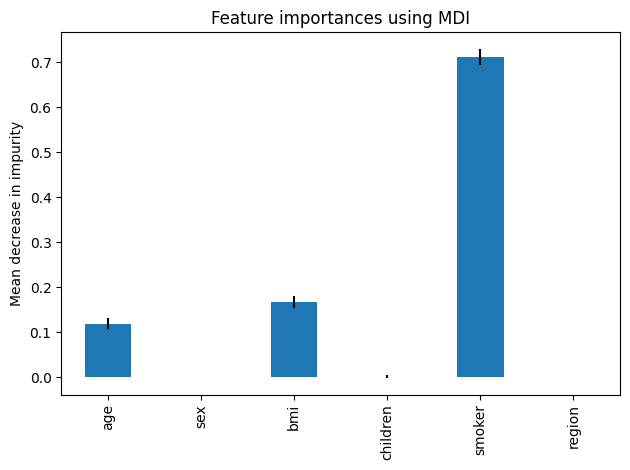

In [24]:
import pandas as pd

feature_names = data.columns.to_numpy()[:-1]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()